In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Полезные ссылки
* [Seaborn Introduction Guide](https://seaborn.pydata.org/tutorial/introduction.html)
* [Matplotlib Quick Start Guide](https://matplotlib.org/stable/users/explain/quick_start.html)
* [Introduction to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

### Описание датасета

Датасет с Data Science зарплатами содержит 11 столбцов, где:

+ `work_year`: Год, когда была выплачена зарплата.

+ `experience_level`: Уровень опыта работы на данной должности в течение года

+ `employment_type`: Тип занятости для данной роли

+ `job_title`: Должность, на которой работал сотрудник в течение года.

+ `salary`: Общая сумма зарплаты GROSS
+ `salary_currency`: Валюта зарплаты в виде кода валюты ISO 4217.
+ `salaryinusd`: **зарплата в долларах США. Целевая переменная.**
+ `employee_residence`: Основная страна пребывания сотрудника в течение рабочего года в виде кода страны ISO 3166.
+ `remote_ratio`: Общий объем работы, выполняемой удаленно
+ `company_location`: Страна, в которой находится главный офис или филиал работодателя.
+ `company_size`: Медианное количество человек, работавших в компании в течение года

In [3]:
df = pd.read_csv('res/ds_salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
# Свойство T позволяет поменять при отображении местами поля датасета и свойства, описывающие их
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


### Обработка исходных данных

In [5]:
# Поиск дубликатов строк в датасете
duplicated = df[df.duplicated()]
duplicated

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [6]:
# Оставляем только уникальные строки (данные)
df = df.drop_duplicates().reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               2584 non-null   int64 
 1   work_year           2584 non-null   int64 
 2   experience_level    2584 non-null   object
 3   employment_type     2584 non-null   object
 4   job_title           2584 non-null   object
 5   salary              2584 non-null   int64 
 6   salary_currency     2584 non-null   object
 7   salary_in_usd       2584 non-null   int64 
 8   employee_residence  2584 non-null   object
 9   remote_ratio        2584 non-null   int64 
 10  company_location    2584 non-null   object
 11  company_size        2584 non-null   object
dtypes: int64(5), object(7)
memory usage: 242.4+ KB


### Описательный анализ
 
+ Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?
+ Влияет ли удаленная работа на зарплату? Есть ли корреляция?
+ Зависит ли заработная плата от размера предприятия?
+ Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?
+ Оцените медианную зарплату для каждой должности.
+ Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?
+ Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.
+ Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?
+ Выявите новые инсайты, если захотите! Творите!

#### Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?

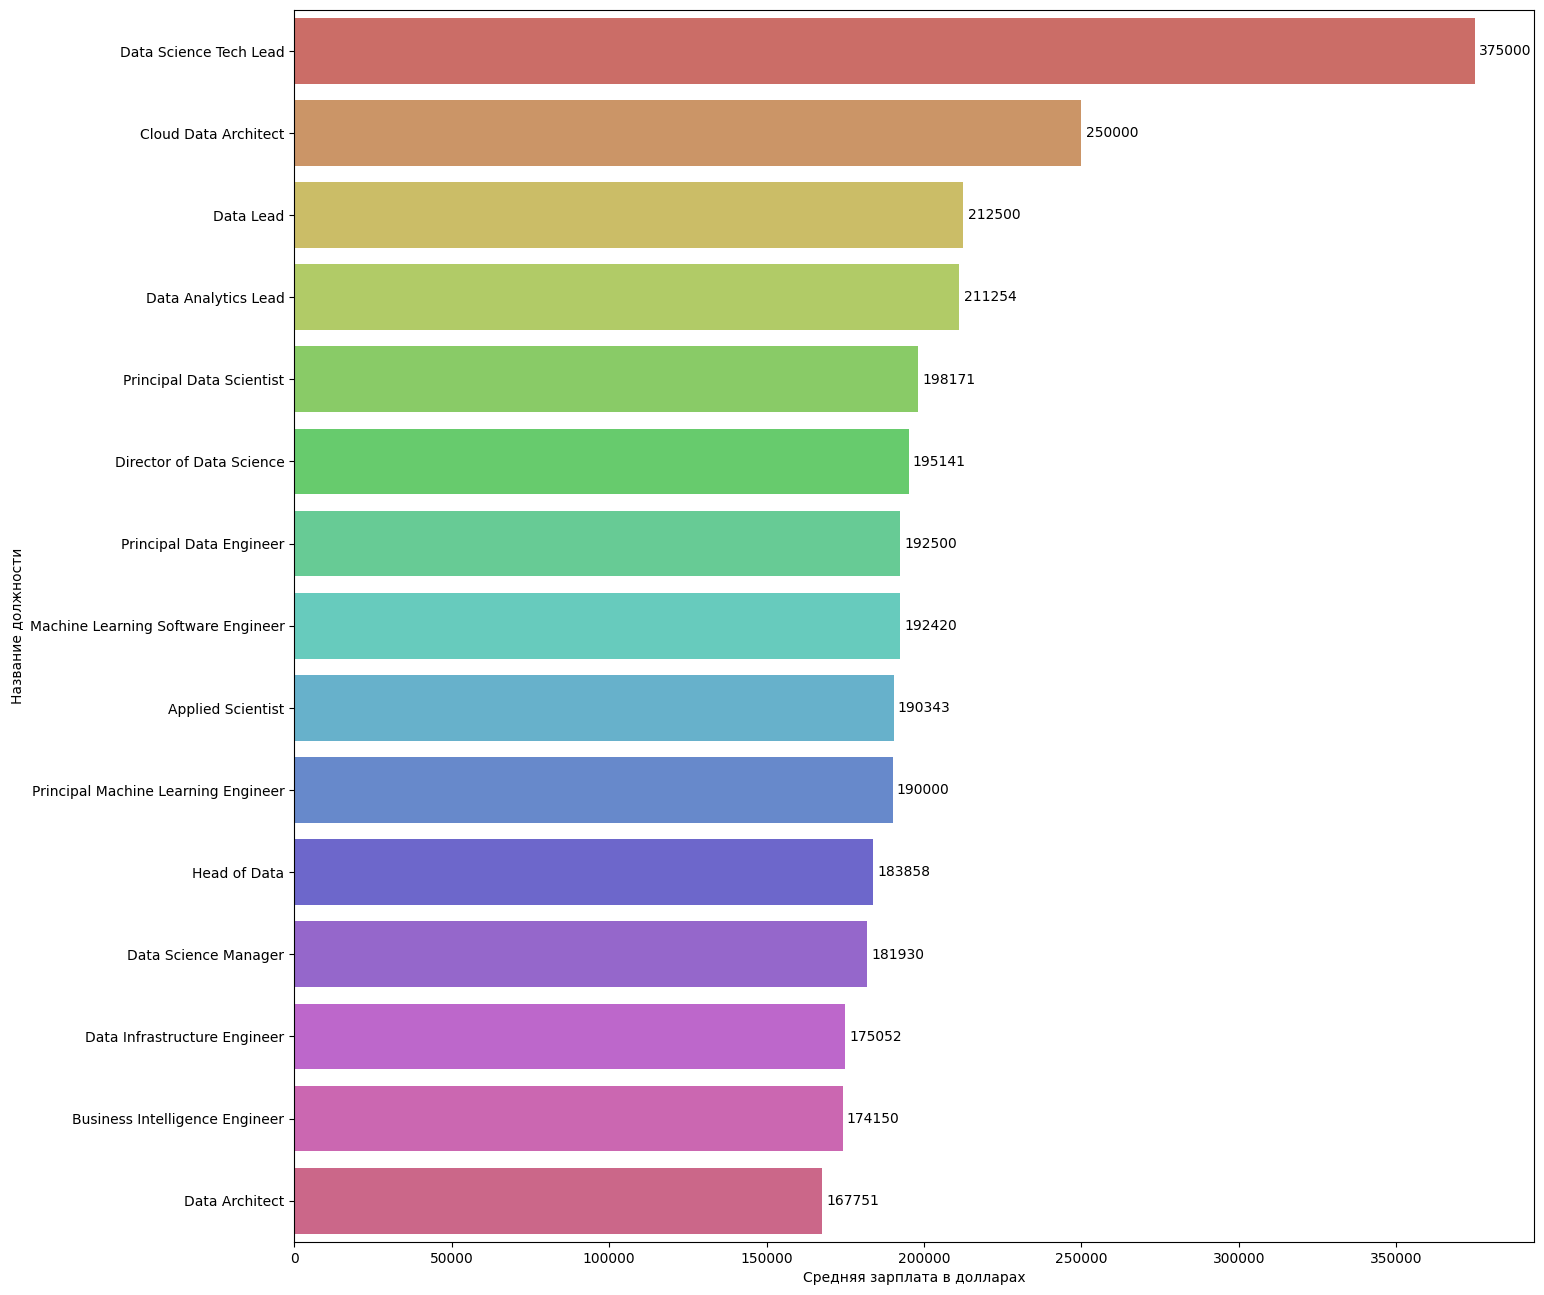

In [47]:
# Самые оплачиваемые должности по средней зарплате в USD (ТОП-15)
most_payed = df.groupby(by=['job_title'])['salary_in_usd'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(16, 16))
plot = sns.barplot(x=most_payed, y=most_payed.index, hue=most_payed.index, palette='hls')
plot.set(xlabel='Средняя зарплата в долларах', ylabel='Название должности')

# Добавление значений для отображения всех значений у столбцов графика
# Необходимо из-за использования параметра hue
for container in plot.containers:
    plot.bar_label(container, padding=3)

plt.show()

Из графика видно, что наибольшую заработную плату в среднем имеют специалисты с должностью `Data Science Tech Lead`. Далее - по убывающей

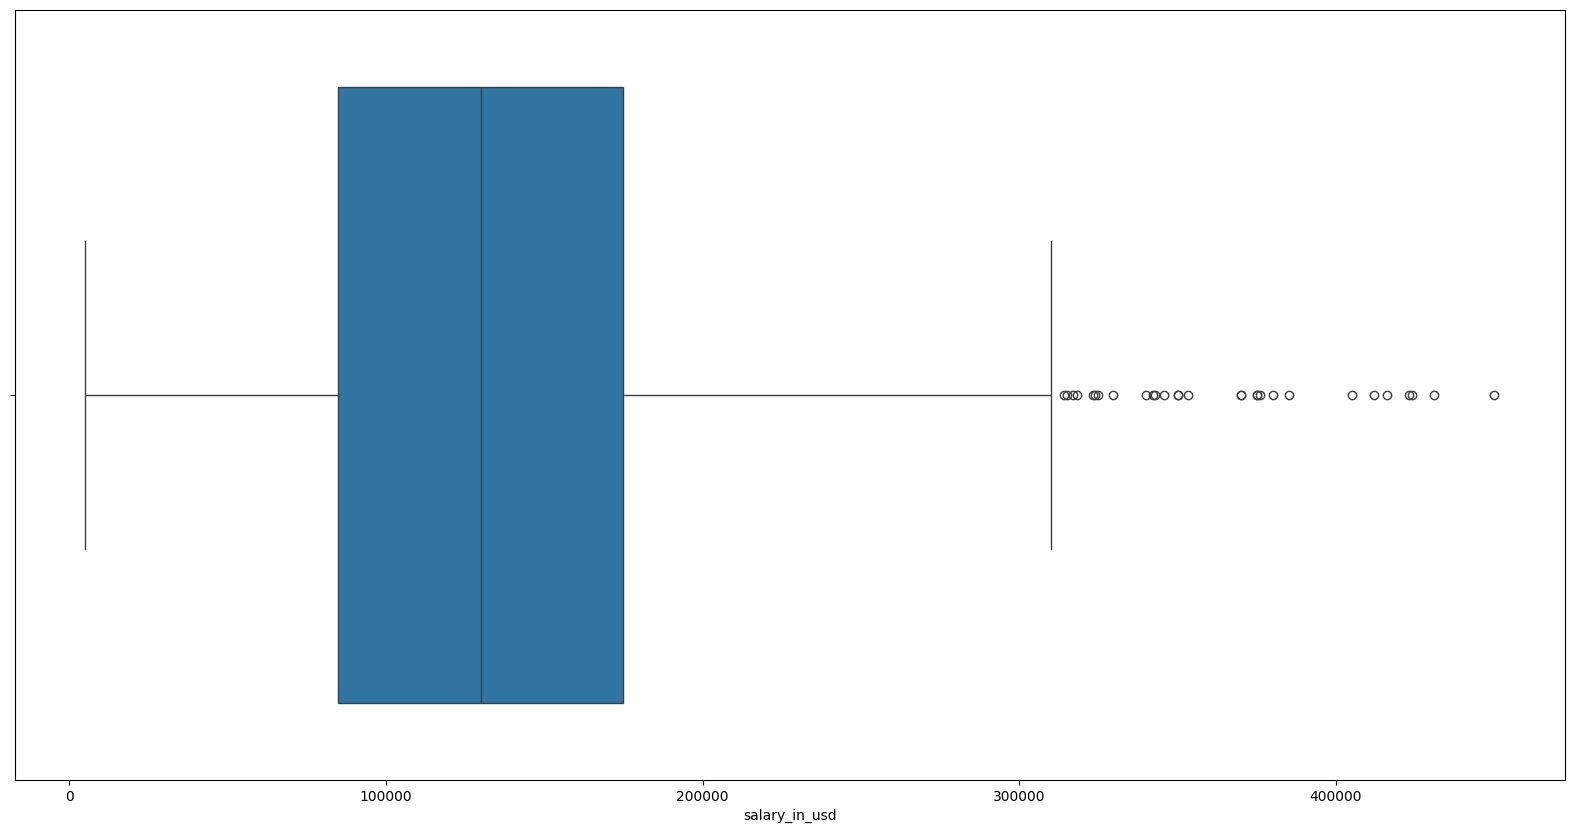

Значение медианы:130000.0
Значение верхней границы: 310037.5; Количество значений-выбросов: 29


In [92]:
# Для проверки наличия выбросов в заработной плате строится график "ящик с усами"
plt.figure(figsize=(20,10))
box_plot = sns.boxplot(df['salary_in_usd'], orient='h')
plt.show()

# Вывод значения медианы в консоль
print('Значение медианы:' + str(df['salary_in_usd'].median()))

# Вычисление первого квартиля
q1 = df['salary_in_usd'].quantile(0.25)
# Вычисление третьего квартиля
q3 = df['salary_in_usd'].quantile(0.75)
# Вычисление межквартильного размаха
iqr = q3 - q1
# Вычисление верхней границы
upper_bound = q3 + 1.5 * iqr

outrange_data = df[(df['salary_in_usd'] >= upper_bound)]
outrange_values = len(outrange_data.axes[0])
print(f'Значение верхней границы: {upper_bound}; Количество значений-выбросов: {outrange_values}')

In [91]:
outrange_data['job_title'].value_counts()
# print(outrange_data['job_title'].value_counts().index)

Index(['Data Scientist', 'Machine Learning Engineer', 'Research Scientist',
       'Data Analyst', 'Data Architect', 'Director of Data Science',
       'Data Engineer', 'Computer Vision Engineer', 'AI Scientist',
       'Head of Data', 'Machine Learning Software Engineer',
       'Head of Data Science', 'Applied Scientist', 'Data Science Tech Lead',
       'Data Analytics Lead', 'Applied Data Scientist',
       'Principal Data Scientist', 'Applied Machine Learning Scientist'],
      dtype='object', name='job_title')


Медианная заработная плата: `130000` долларов

Имеется множество точек, обозначающих статистические выбросы. В датасете 29 записей с заработной платой свыше `310037.5` долларов в следующих должностях: Data Scientist, Machine Learning Engineer, Research Scientist,Data Analyst, Data Architect, Director of Data Science,Data Engineer, Computer Vision Engineer, AI Scientist,Head of Data, Machine Learning Software Engineer,Head of Data Science, Applied Scientist, Data Science Tech Lead,Data Analytics Lead, Applied Data Scientist,Principal Data Scientist, Applied Machine Learning Scientist

#### Влияет ли удаленная работа на зарплату? Есть ли корреляция?

In [93]:
df[:5]

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


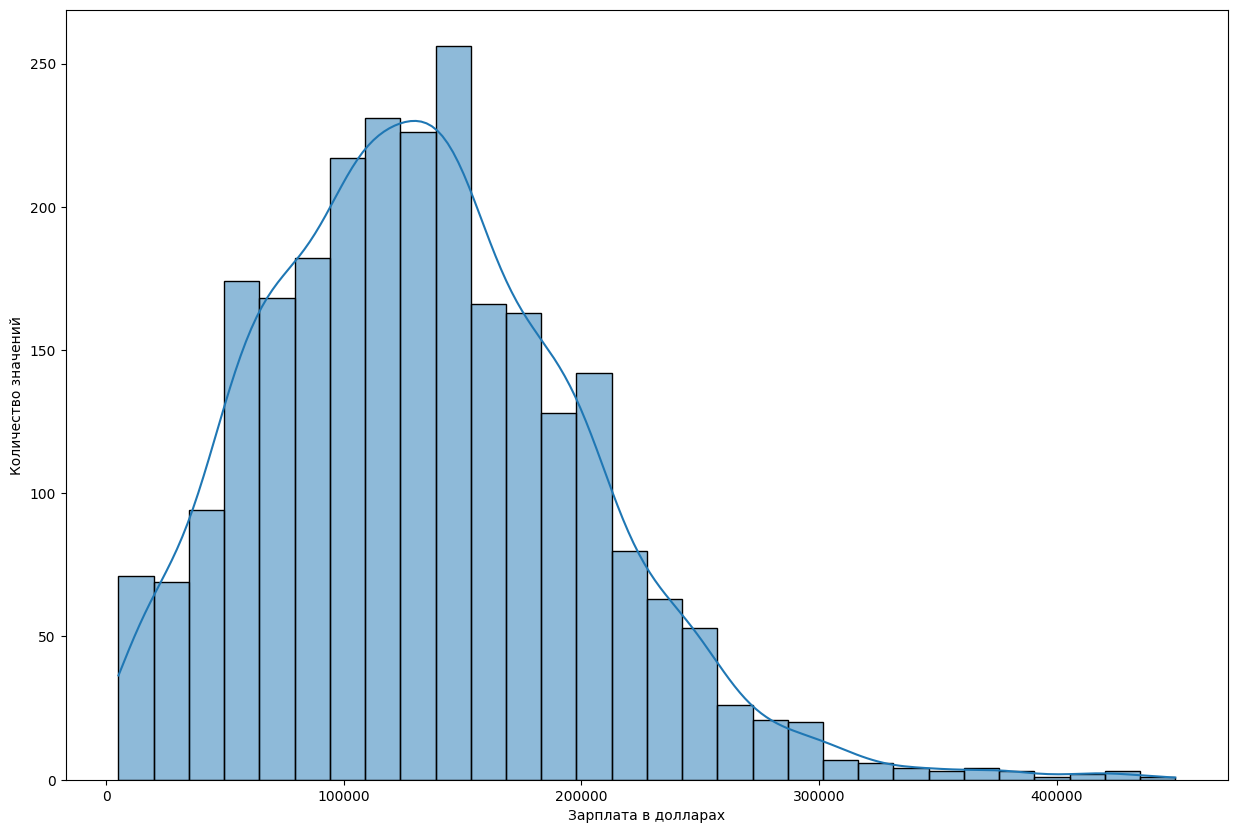

In [107]:
plt.figure(figsize=(15, 10))
# Значений всего 3, не очень удобно использовать график распределения
# sns.scatterplot(x=df.remote_ratio, y=df.salary_in_usd)

# Построение гистограммы для определения распределения
# data: Набор данных для построения гистограммы
# bins: Количество интервалов, на которые разбивается диапазон данных. bins=30 означает, что диапазон данных будет разделен на 30 равных интервалов
# kde: Параметр, который добавляет сглаженную кривую плотности вероятности (Kernel Density Estimate)
hist_plot = sns.histplot(df['salary_in_usd'], bins=30, kde=True)
hist_plot.set(xlabel='Зарплата в долларах', ylabel='Количество значений')
plt.show()

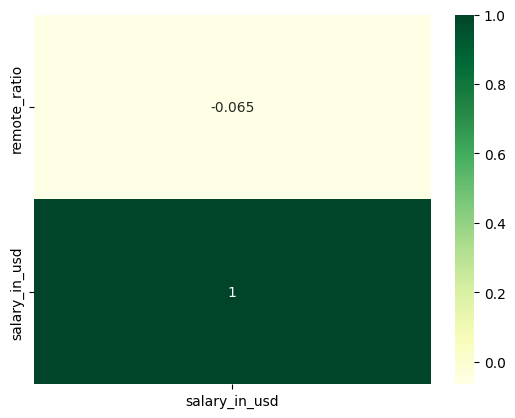

In [125]:
two_params_df = df[['remote_ratio', 'salary_in_usd']]
# Вычислить матрицу корреляции параметров remote_raio и salary_in_usd
# Для расчета корреляции используется метод Кендалла, т.к. в данных имеются выбросы
corr_matrix = two_params_df.corr(method='kendall')

# Отображение "Тепловой карты" только для salary_in_usd матрицы corr_matrix
# В отображении всех параметров нет необходимости, т.к. необходимо отследить корреляцию "других параметров" только с одним параметром
sns.heatmap(corr_matrix[['salary_in_usd']], annot=True, cmap='YlGn');

Для вычисление матрицы корреляции параметра `remote_ratio` с параметром `salary_in_usd` используется метод Кендалла, т.к. ранее установлено наличие выбросов в заработной плате.

Результат вычислений визуализирован посредством тепловой карты, на основании которой можно сделать вывод об отсутствии корреляции и влияния удаленной работы на заработную плату.

#### Зависит ли заработная плата от размера предприятия?

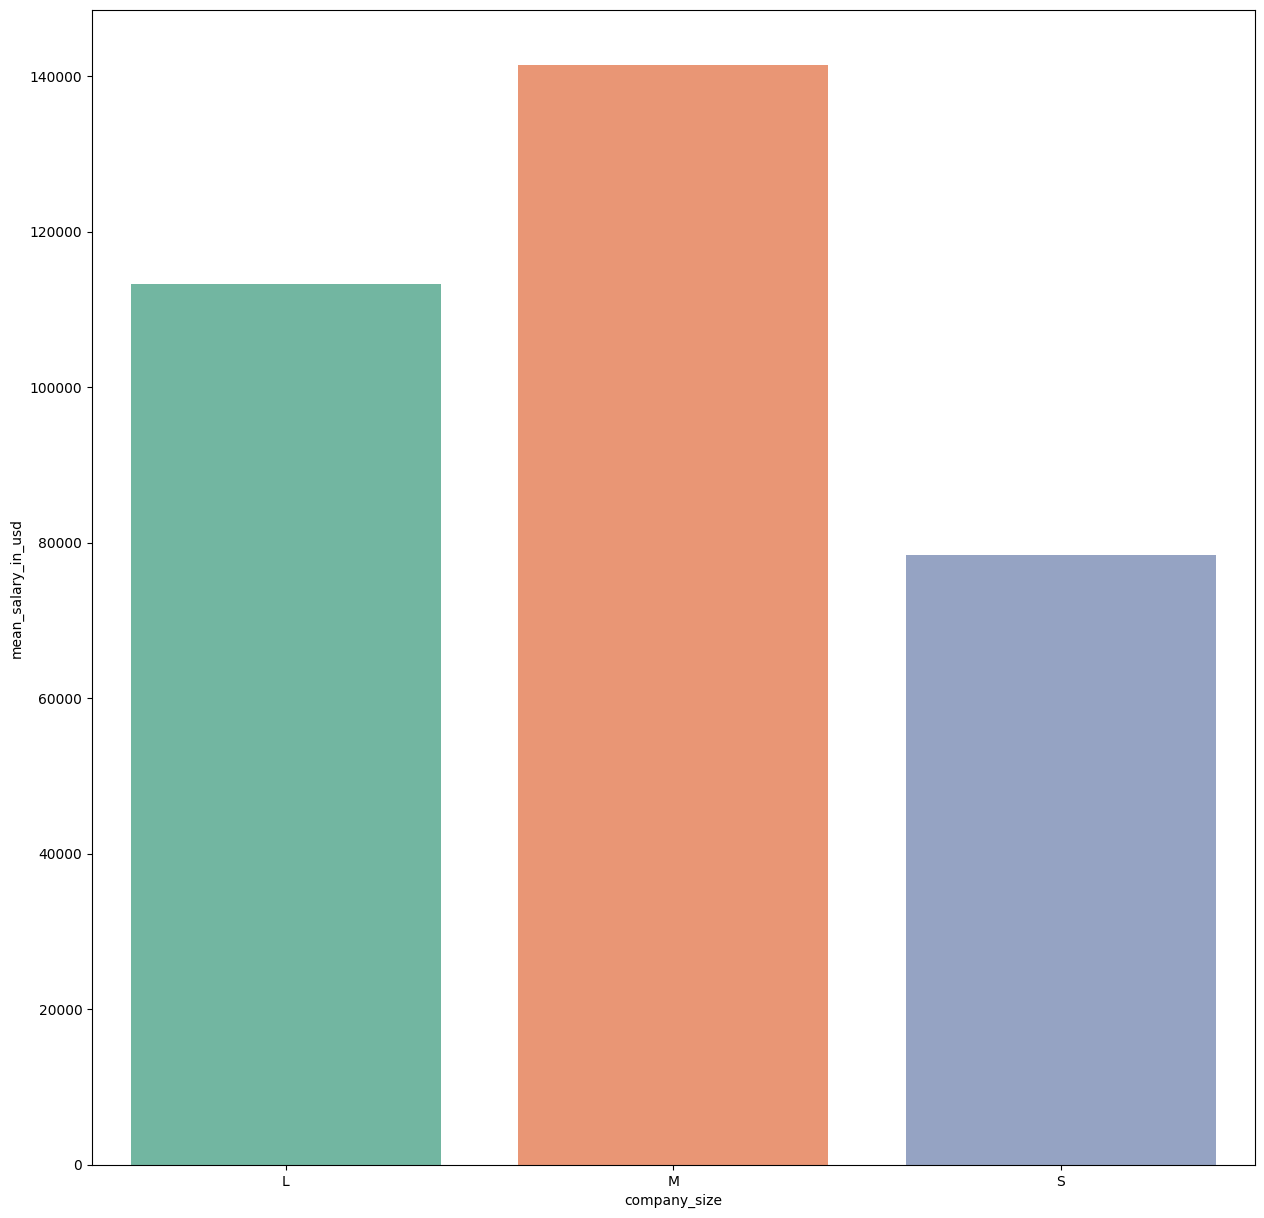

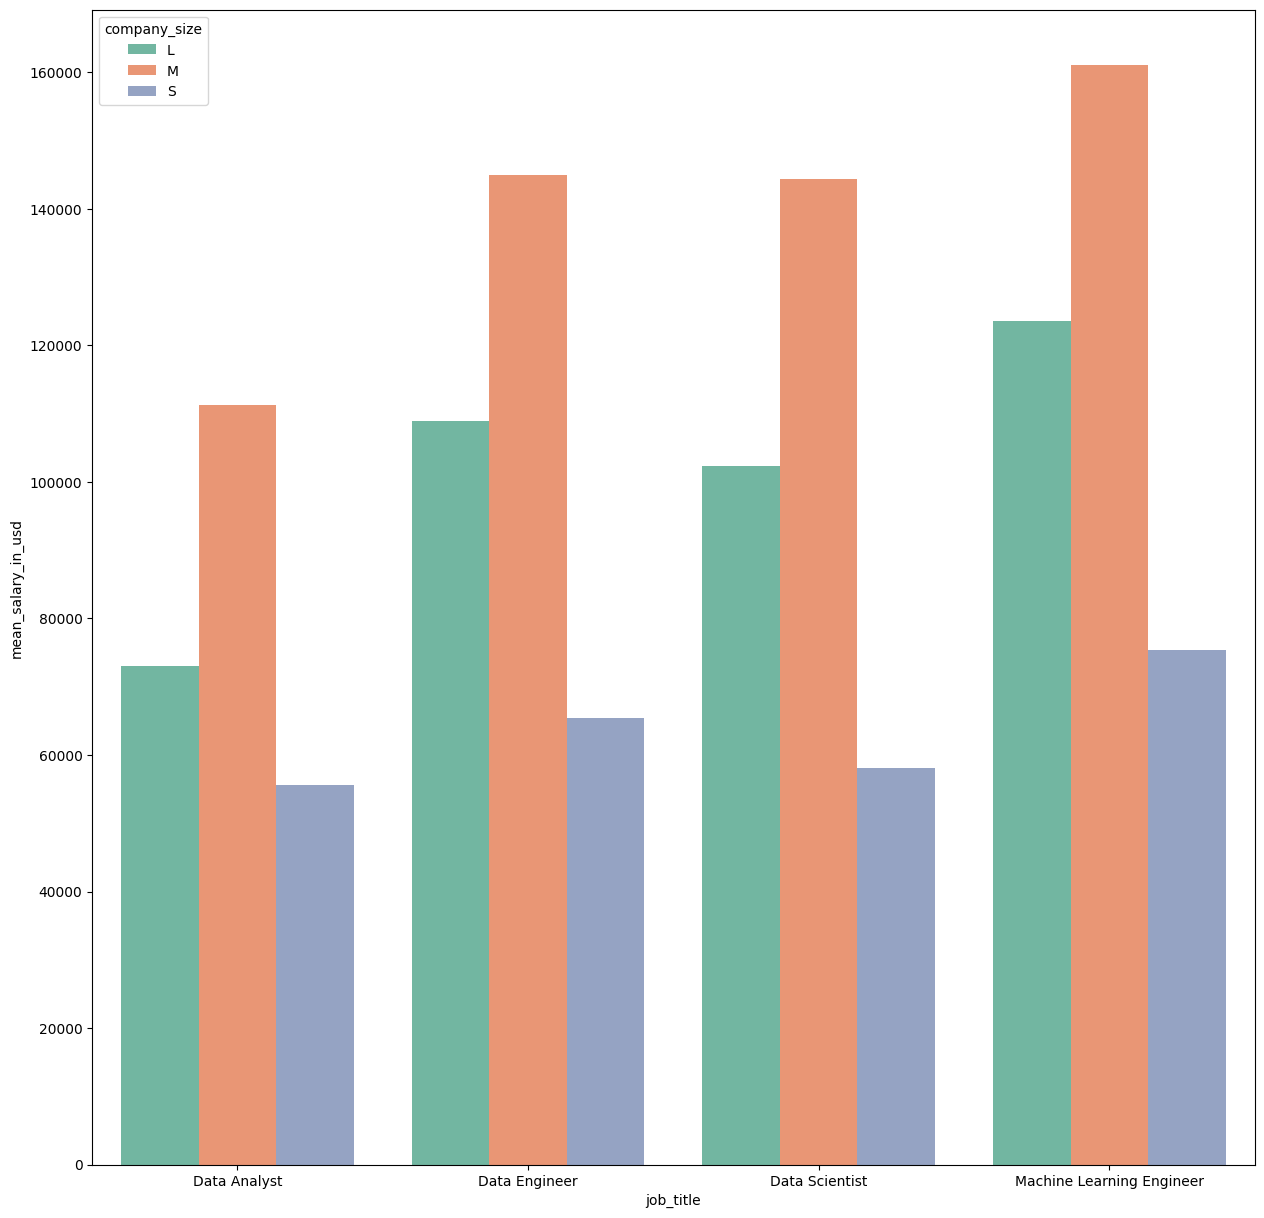

In [197]:
# Средняя ЗП специалистов на предприятиях различного размера
company_df = df.groupby(['company_size']).agg(mean_salary_in_usd=('salary_in_usd', 'mean'))

plt.figure(figsize=(15, 15))
barplot = sns.barplot(x='company_size', y='mean_salary_in_usd', hue='company_size', data=company_df, palette='Set2')
plt.show()

############################ДИЧЬ#################################
# Преобразование категорий в числа для поиска корреляции
# two_params_df = df[['company_size', 'salary_in_usd']]
# two_params_df['company_size'].replace(['L', 'M', 'S'], ['3', '2', '1'], inplace=True)
# two_params_df['company_size'] = two_params_df['company_size'].astype(pd.Int64Dtype())
# corr_matrix = two_params_df.corr()

# sns.heatmap(corr_matrix[['salary_in_usd']], annot=True, cmap='YlGn');

###########################ДИЧЬ2#################################
# Попытка в сравнение ЗП по каждой должности (выбрал 4 самых популярных) в компаниях разного размера
# df['job_title'].value_counts()
jobs = ['Machine Learning Engineer', 'Data Analyst', 'Data Scientist', 'Data Engineer']
company_df = df[(df['job_title'].isin(jobs))]
company_df = company_df.groupby(['company_size', 'job_title']).agg(mean_salary_in_usd=('salary_in_usd', 'mean'))
plt.figure(figsize=(15, 15))
barplot = sns.barplot(x='job_title', y='mean_salary_in_usd', hue='company_size', data=company_df, palette='Set2')
plt.show()


Исходя из полученных результатов, можно сделать вывод о том, что в предприятиях среднего масштаба заработная плата наиболее высока, что, скорее всего, связано с небольшим относительно крупных компаний штатом сотрудников и большей относительно малых компаний доходностью. Статистические выбросы кардинально на результатах не сказываются.

#### Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?

+ Оцените медианную зарплату для каждой должности.
+ Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?
+ Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.
+ Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?